<a href="https://colab.research.google.com/github/evangrinalds/DS-Unit-4-Sprint-3-Deep-Learning/blob/main/LS_DS18_Unit_4_Sprint_Challenge_3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
!unzip frog_images

Archive:  frog_images.zip
replace __MACOSX/._frog_images? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: __MACOSX/._frog_images  
replace frog_images/elizabeth-explores-JZybccsrB-0-unsplash.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: frog_images/elizabeth-explores-JZybccsrB-0-unsplash.jpg  
replace __MACOSX/frog_images/._elizabeth-explores-JZybccsrB-0-unsplash.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: __MACOSX/frog_images/._elizabeth-explores-JZybccsrB-0-unsplash.jpg  
replace frog_images/jared-evans-VgRnolD7OIw-unsplash.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: frog_images/jared-evans-VgRnolD7OIw-unsplash.jpg  
replace __MACOSX/frog_images/._jared-evans-VgRnolD7OIw-unsplash.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: __MACOSX/frog_images/._jared-evans-VgRnolD7OIw-unsplash.jpg  
replace frog_images/jacky-watt-92W5jPbOj48-unsplash.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: frog_images/jacky-watt

In [2]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [3]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [4]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

maxlen = 80
batch_size = 32

In [5]:
from __future__ import print_function
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM

In [6]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

8982 train sequences
2246 test sequences


In [7]:
print('Pad Sequences (samples X time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

Pad Sequences (samples X time)
X_train shape:  (8982, 80)
X_test shape:  (2246, 80)


In [8]:
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         3965440   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 4,097,153
Trainable params: 4,097,153
Non-trainable params: 0
_________________________________________________________________


In [9]:
unicorns = model.fit(X_train, y_train, 
          epochs=5, 
          validation_data=(X_test,y_test))

Epoch 1/5
281/281 [==============================] - 104s 370ms/step - loss: -233.0336 - accuracy: 0.0501 - val_loss: -379.8994 - val_accuracy: 0.0396
Epoch 2/5
281/281 [==============================] - 106s 376ms/step - loss: -525.5214 - accuracy: 0.0499 - val_loss: -656.7667 - val_accuracy: 0.0396
Epoch 3/5
281/281 [==============================] - 106s 378ms/step - loss: -803.6076 - accuracy: 0.0499 - val_loss: -930.0657 - val_accuracy: 0.0396
Epoch 4/5
281/281 [==============================] - 105s 375ms/step - loss: -1082.3674 - accuracy: 0.0499 - val_loss: -1206.3235 - val_accuracy: 0.0396
Epoch 5/5
281/281 [==============================] - 106s 376ms/step - loss: -1360.9178 - accuracy: 0.0499 - val_loss: -1479.7504 - val_accuracy: 0.0396


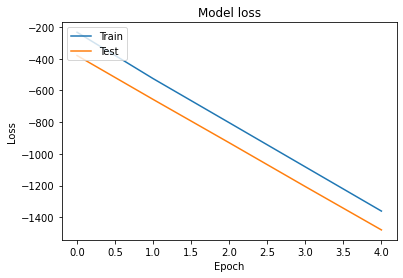

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(unicorns.history['loss'])
plt.plot(unicorns.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

## Sequence Data Question
__*Question:*__ *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

__*Answer:*__ Sequences are lists of lists where each element is a sequence. Padding is adding pre or post before or after the sequence

## RNNs versus LSTMs
__*Question:*__ *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

__*Answer:*__ The advantage of LSTM is that it can put more weight on recent (short-term) events while not completely losing older (long-term) information. After enough iterations, a typical neural network will start calculating prior gradients that are so small they effectively become zero, this is the vanishing gradient problem, and is what RNN with LSTM addressess.

## RNN / LSTM Use Cases
__*Question:*__ *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

__*Answer:*__ 1. Use their internal state (memory) to process variable length sequences of inputs. 2. Stock market data  3. Speech recognition


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

In [11]:
# Preprocessing functions

import numpy as np
from IPython.display import Image
from skimage.transform import resize # This might be a helpful function for you
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input, decode_predictions

In [12]:
from skimage.io import imread_collection

images = imread_collection('./frog_images/*.jpg')

In [13]:
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



In [14]:
# Resize the images

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_predict(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    # print(x, x.shape)
    x = preprocess_input(x)
    # print(x)
    features = model.predict(x)
    # print(features)
    return decode_predictions(features)[0]

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [15]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

model = ResNet50V2(weights='imagenet')

102875136/102869336 [==============================] - 4s 0us/step


In [16]:
path = '/content/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash.jpg'

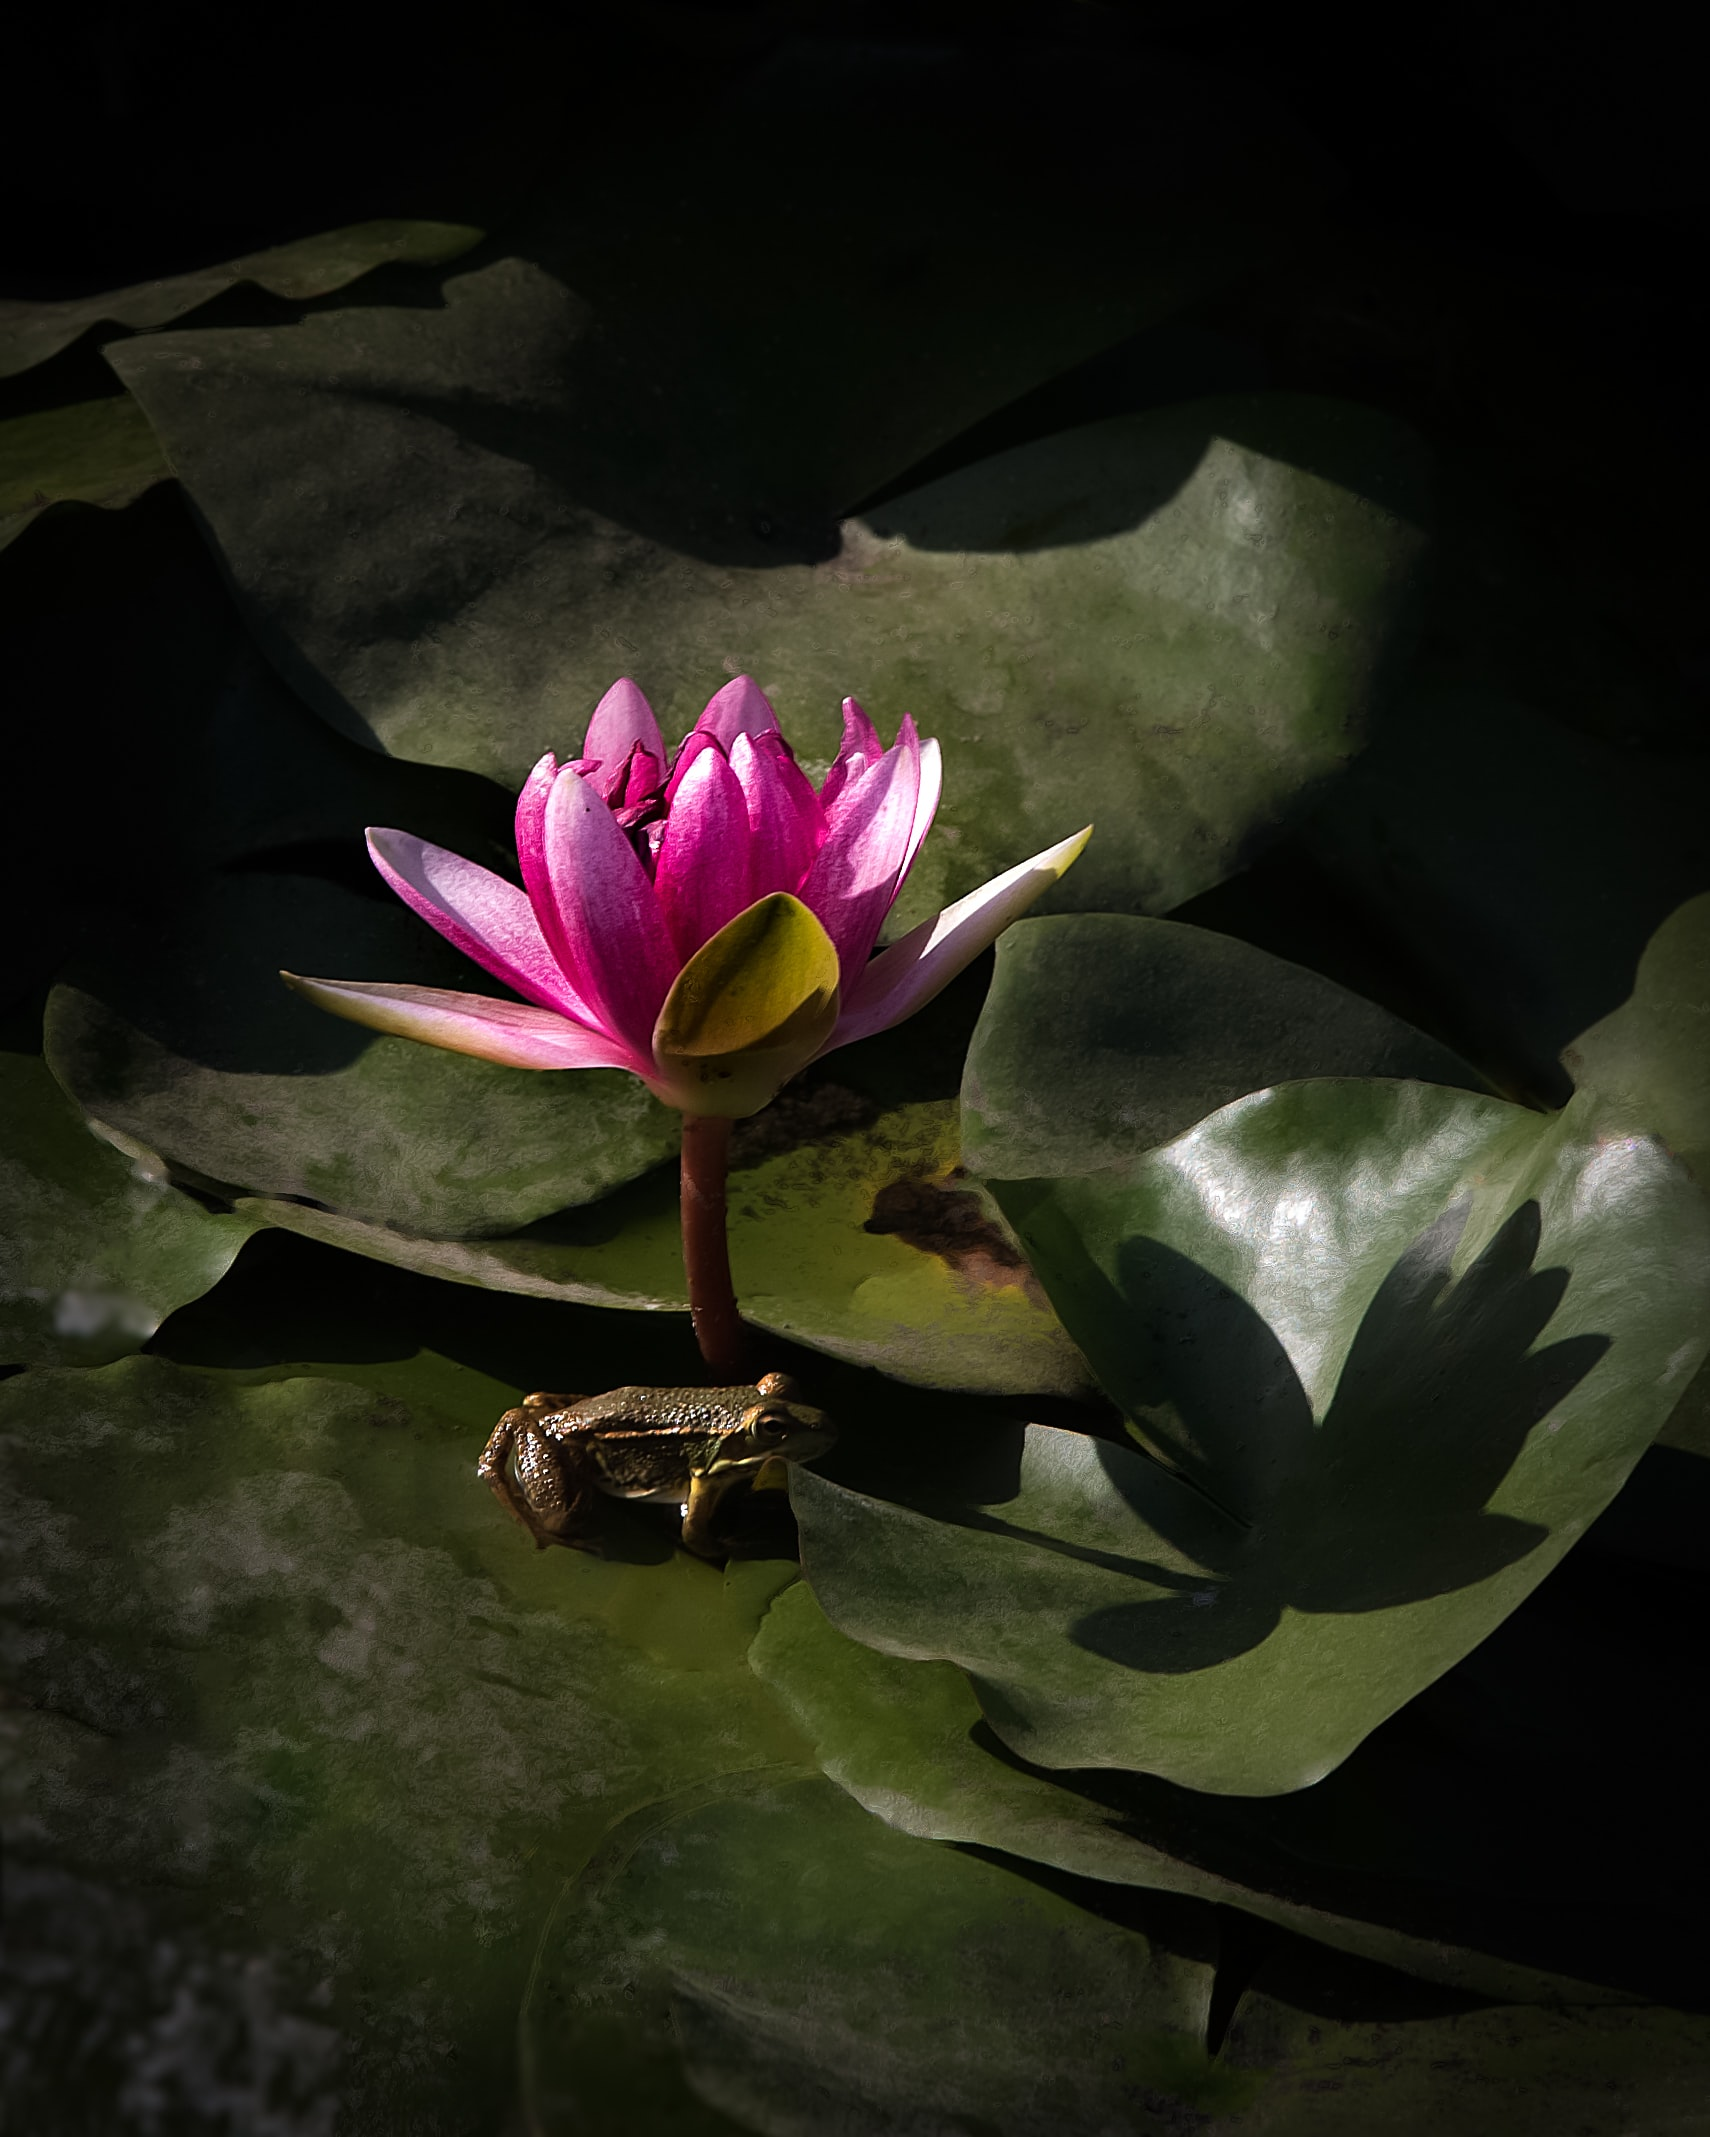

In [17]:
Image(filename=path, height=300)

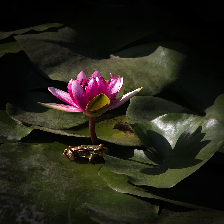

In [18]:
process_img_path(path)

In [19]:
img_predict(process_img_path(path))

40960/35363 [==================================] - 0s 0us/step


[('n03991062', 'pot', 0.43382022),
 ('n04522168', 'vase', 0.18519637),
 ('n07745940', 'strawberry', 0.08433497),
 ('n07614500', 'ice_cream', 0.025083764),
 ('n02206856', 'bee', 0.024161972)]

In [20]:
path1 = '/content/frog_images/drew-brown-VBvoy5gofWg-unsplash.jpg'

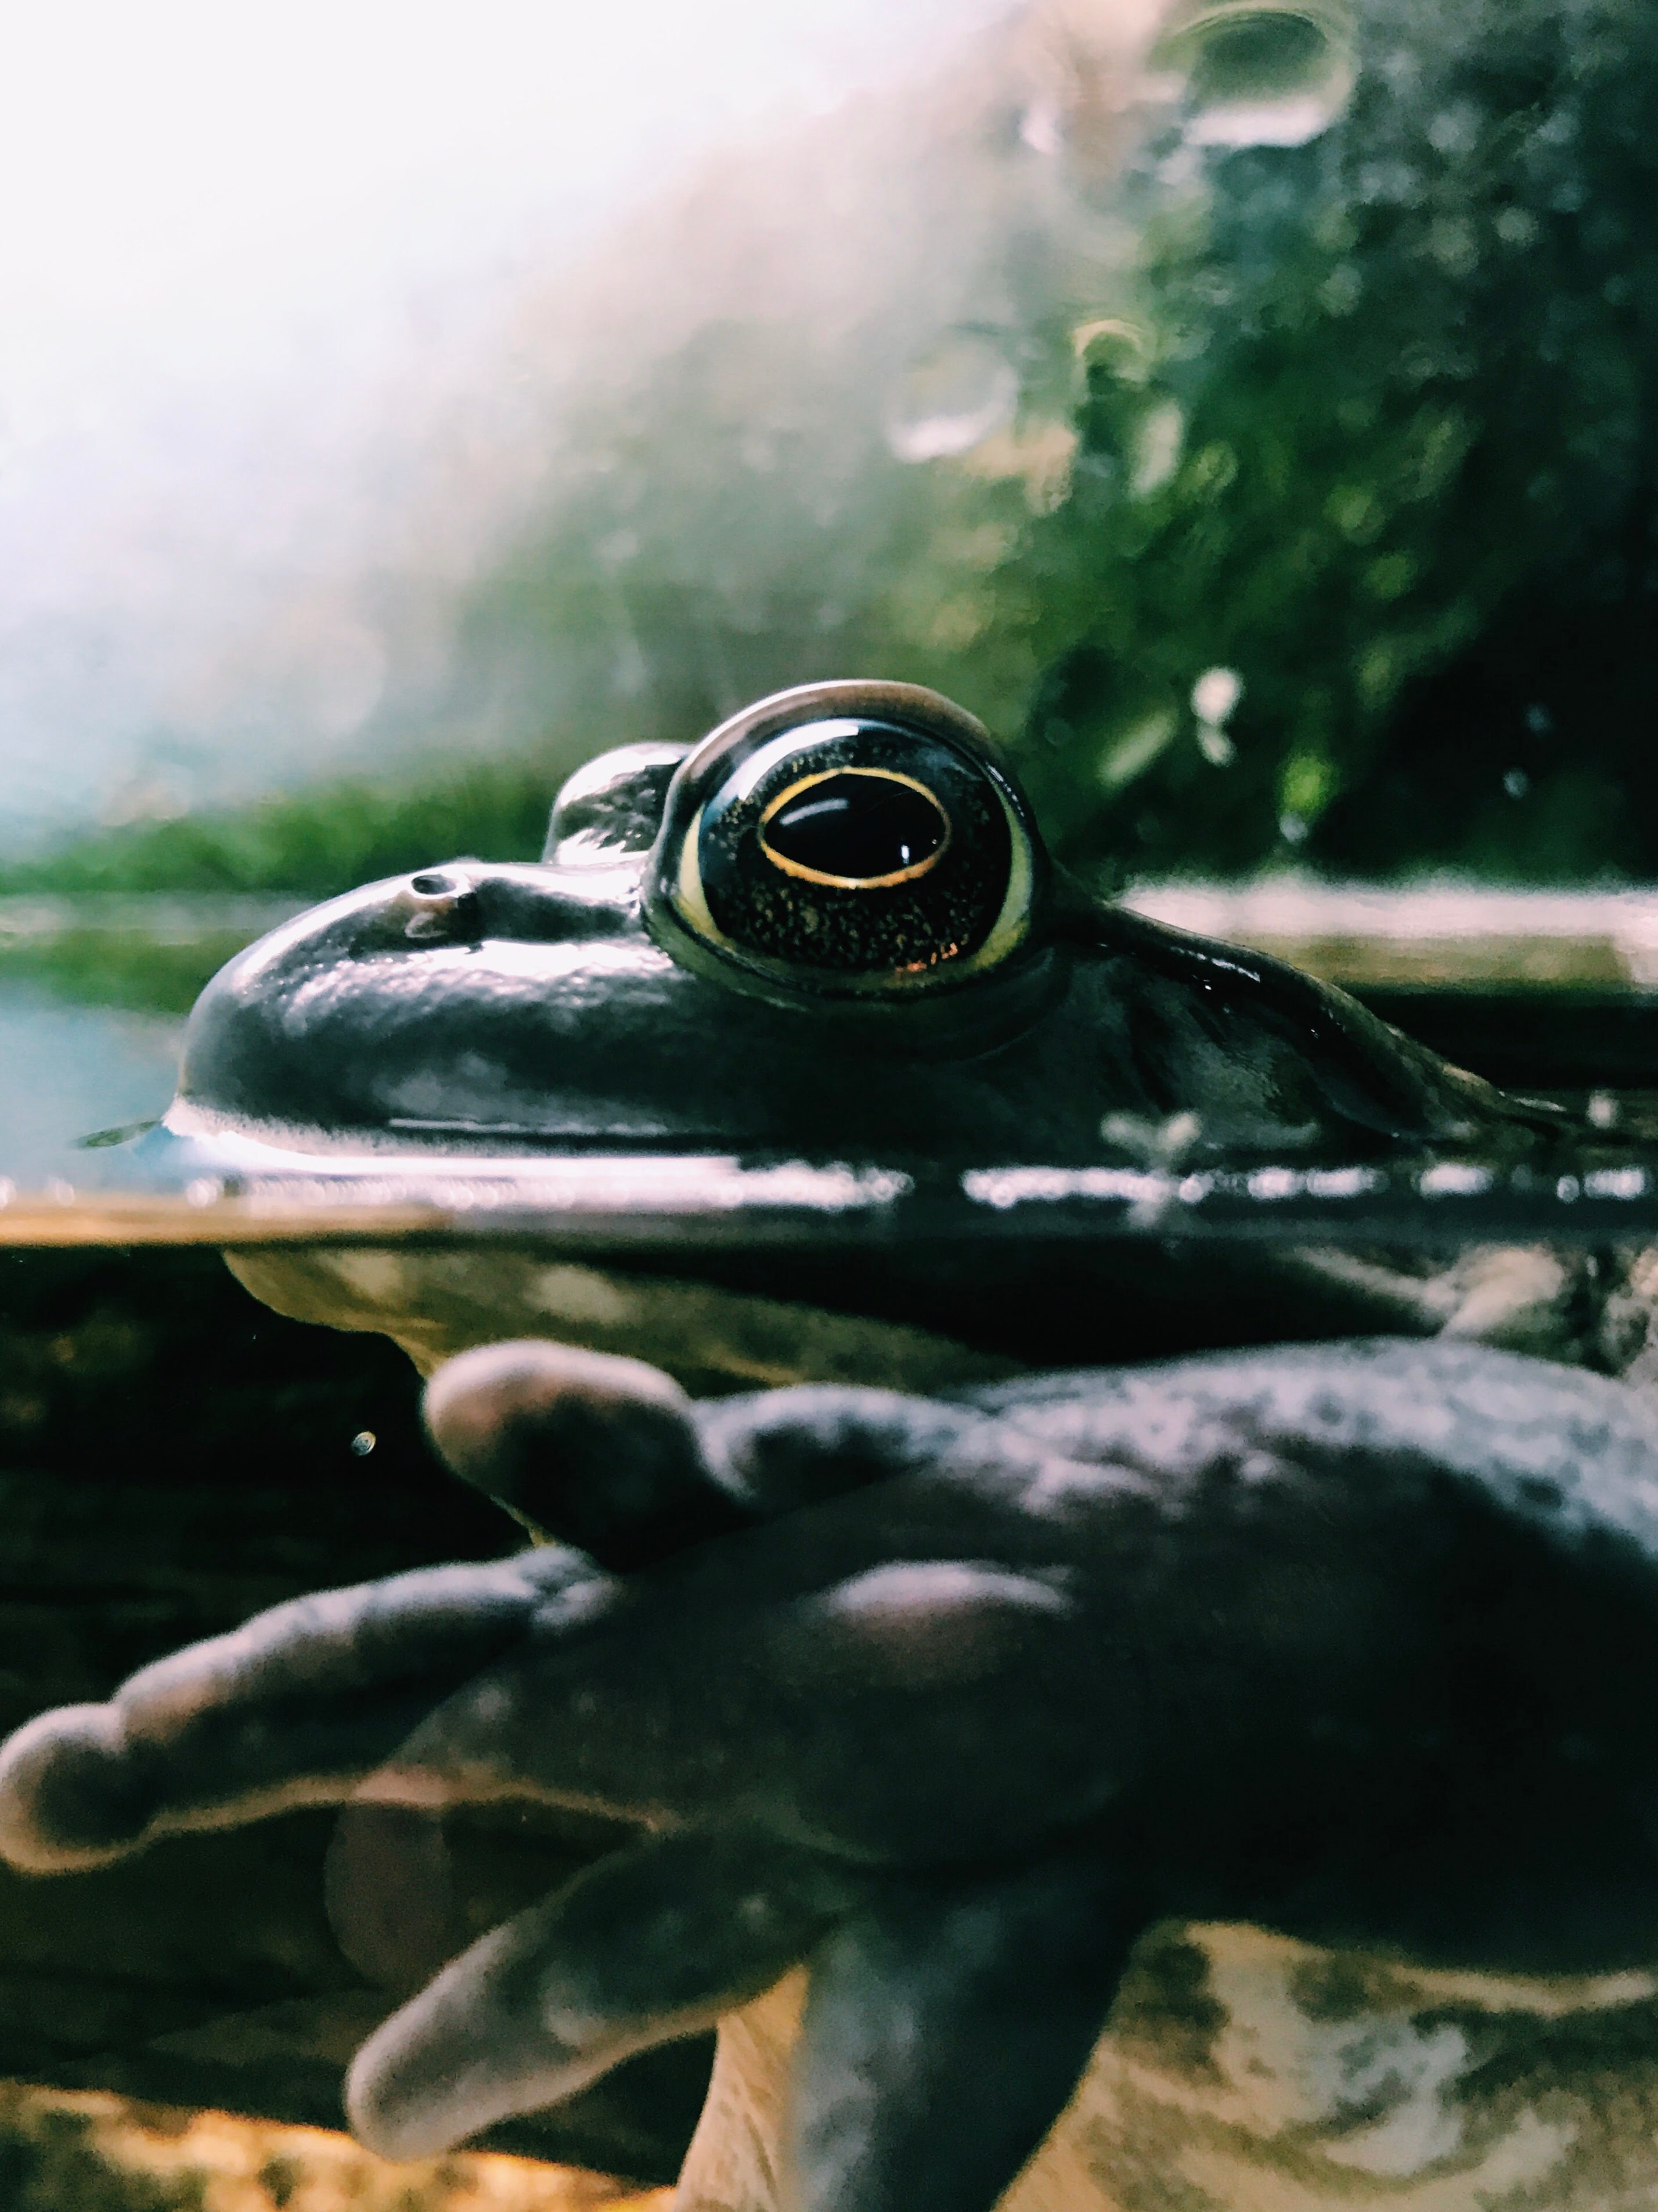

In [22]:
Image(filename=path1, height=300)

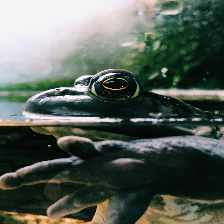

In [23]:
process_img_path(path1)

In [24]:
img_predict(process_img_path(path1))

[('n01641577', 'bullfrog', 0.9959907),
 ('n02655020', 'puffer', 0.0024455937),
 ('n01667778', 'terrapin', 0.0010096651),
 ('n01644900', 'tailed_frog', 0.00030852392),
 ('n02643566', 'lionfish', 8.515812e-05)]

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__  Information Retrieval is a use case for autoencoder. Specifically, reverse image search can be used to locate the source of an image, find higher resolution versions, discover webpages where the image appears, find the content creator or get information about an image.


<a id="p4"></a>
## Part 4 - More...

## Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

__*Your Answer:*__ Generating and answering real world business problems is my top strength as a Data Scientist.
- What area of Data Science would you most like to learn more about, and why?

__*Your Answer:*__ I would of like to spend more time with Unit 3 with the ETL and data pipeline skillset. I see it in every job application description. 
- Where do you think Data Science will be in 5 years?

__*Your Answer:*__ Moore's Law states that number of transistors in a dense integrated circuit doubles about every two years. So it 5 years, I'm confident that the internal state (memory) of the Neural Networks will be more accurate and precise. This exponential trajectory is leading to a technological singulary. Neural Lace is a company trying to integrate machine and human intelligence. 
- What are the threats posed by AI to our society?

__*Your Answer:*__ Oppressive regimes and authoritarian governments can manipulate humans on a scale never seen before in history. The Netflix documentary Social Dilemma exposes where this is already happening in Myanmar. 
- How do you think we can counteract those threats? 

__*Your Answer:*__ I'm going keep it real. I don't think the average person stands a chance. 
- Do you think achieving General Artifical Intelligence is ever possible?

__*Your Answer:*__ Yes, Moore's Law shows that internal state (memory) is doubling every two years so that's the direction we are headed. 


## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [25]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")